### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

Laden und Aufbereiten der Trainingsdaten:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [ ]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(1500, activation='relu'),
    Dense(1500, activation='relu', kernel_regularizer=regularizers.L2(0.005)),
    Dense(10, activation='softmax')])

Ausgabe der Netzstruktur:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15010     
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________


Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 2s 236ms/step - loss: 1.0709 - accuracy: 0.7364 - val_loss: 0.4297 - val_accuracy: 0.8831
Epoch 2/50
10/10 [==============================] - 2s 206ms/step - loss: 0.3779 - accuracy: 0.8910 - val_loss: 0.3106 - val_accuracy: 0.9110
Epoch 3/50
10/10 [==============================] - 2s 192ms/step - loss: 0.2936 - accuracy: 0.9150 - val_loss: 0.2619 - val_accuracy: 0.9244
Epoch 4/50
10/10 [==============================] - 2s 195ms/step - loss: 0.2476 - accuracy: 0.9296 - val_loss: 0.2271 - val_accuracy: 0.9355
Epoch 5/50
10/10 [==============================] - 2s 181ms/step - loss: 0.2154 - accuracy: 0.9399 - val_loss: 0.2021 - val_accuracy: 0.9425
Epoch 6/50
10/10 [==============================] - 2s 193ms/step - loss: 0.1905 - accuracy: 0.9472 - val_loss: 0.1824 - val_accuracy: 0.9468
Epoch 7/50
10/10 [==============================] - 2s 181ms/step - loss: 0.1708 - accuracy: 0.9524 - val_loss: 0.1676 - val_accuracy: 0.9518
Epoch 

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.061180658638477325
Test accuracy: 0.9800999760627747


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

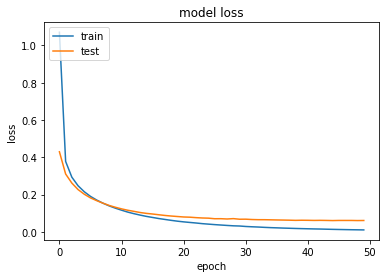

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

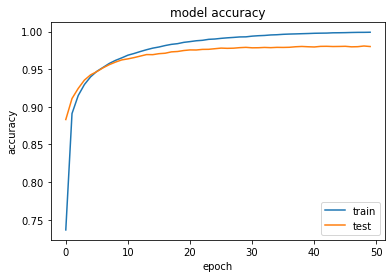

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

199 out of 10000 false classifications in test dataset ( 1.99 % )


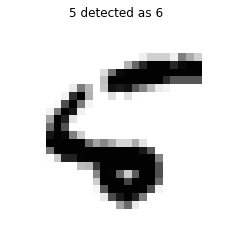

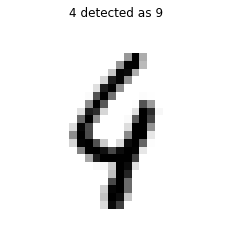

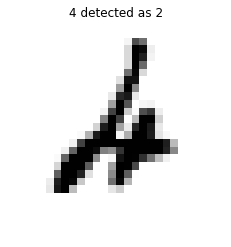

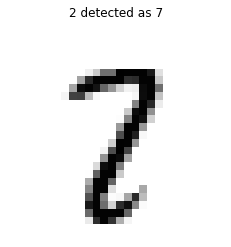

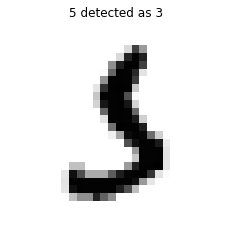

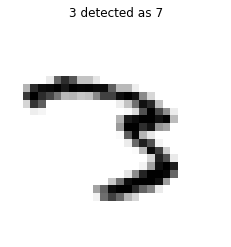

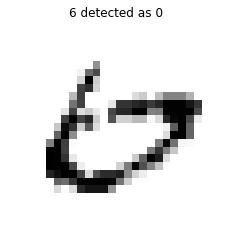

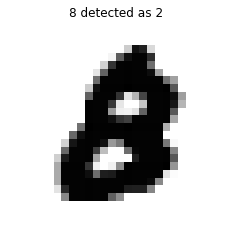

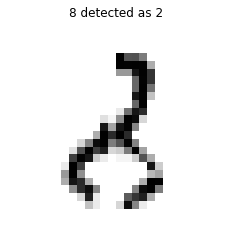

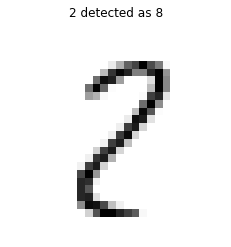

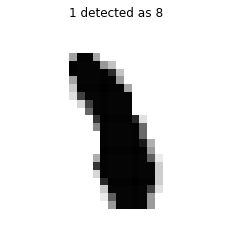

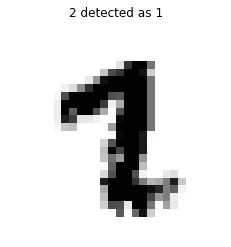

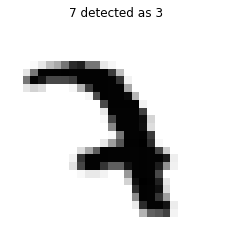

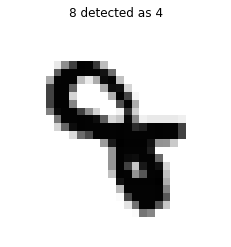

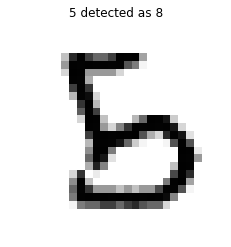

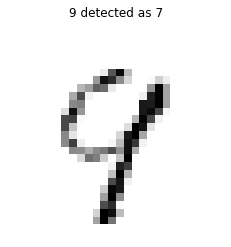

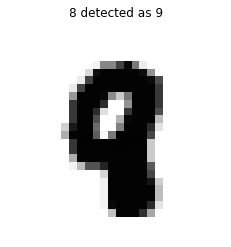

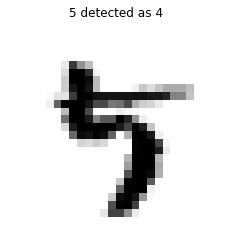

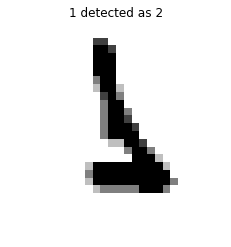

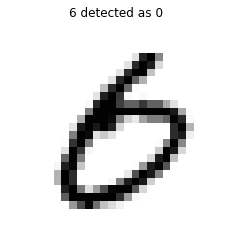

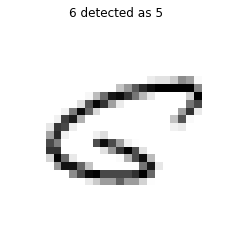

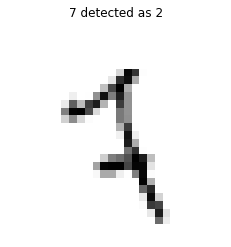

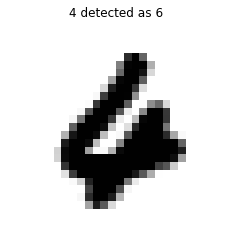

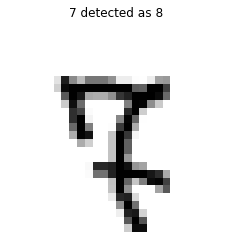

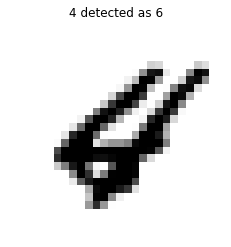

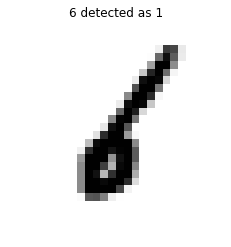

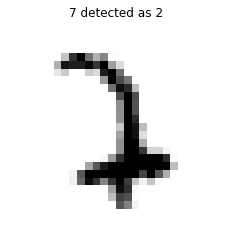

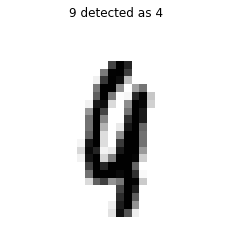

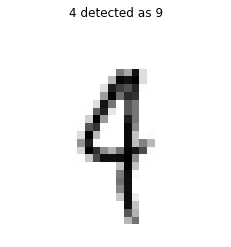

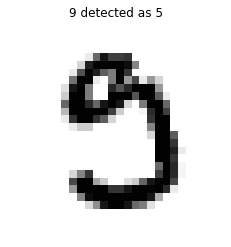

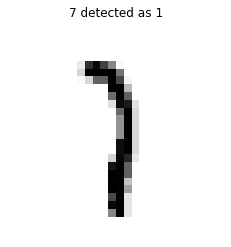

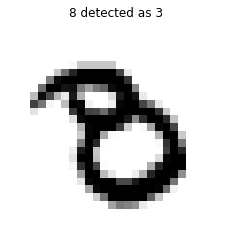

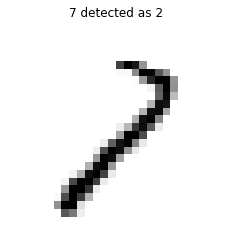

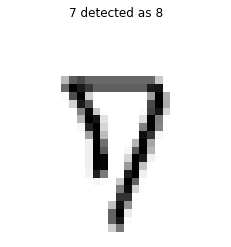

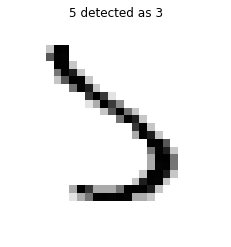

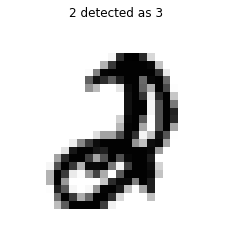

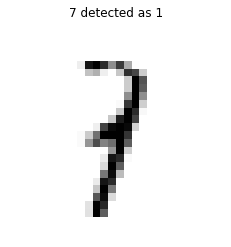

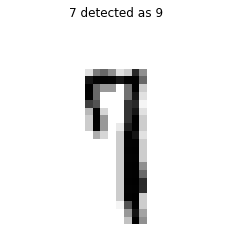

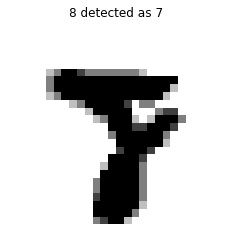

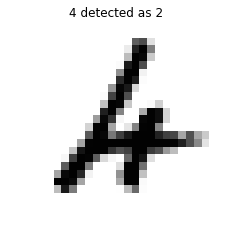

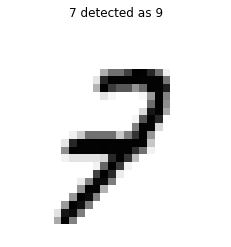

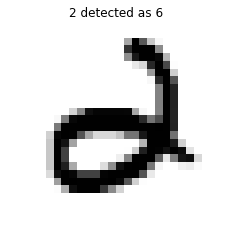

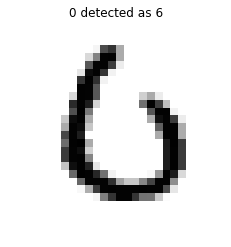

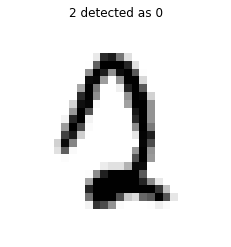

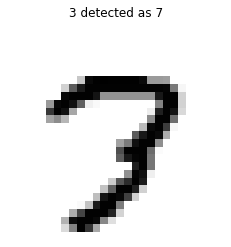

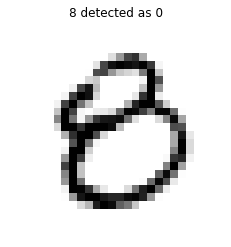

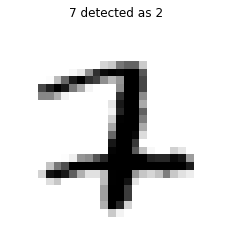

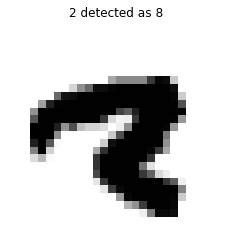

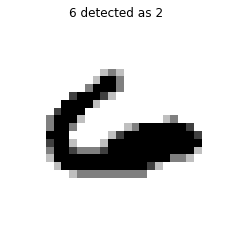

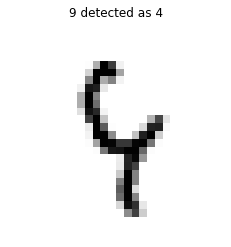

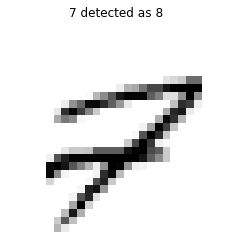

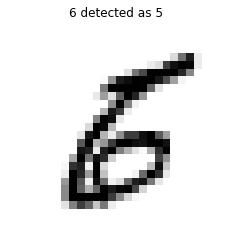

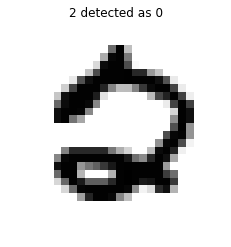

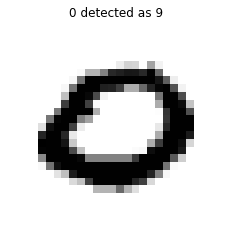

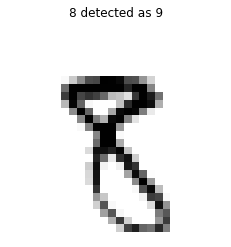

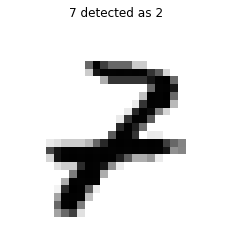

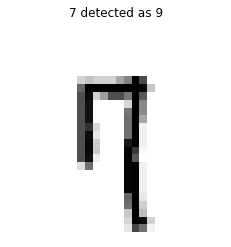

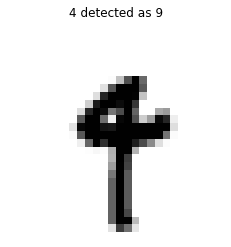

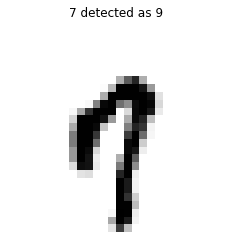

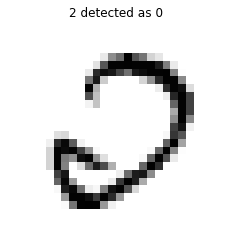

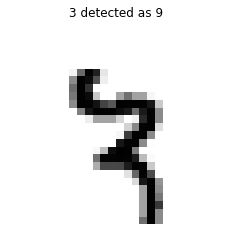

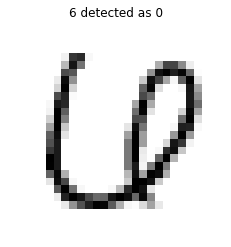

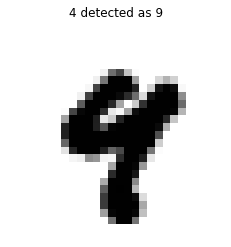

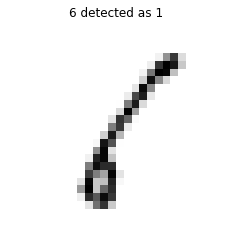

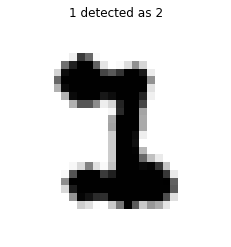

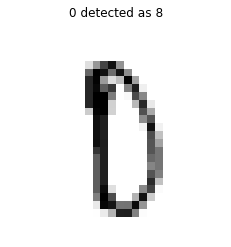

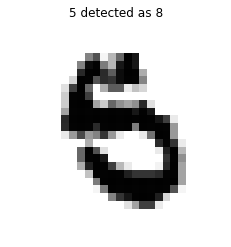

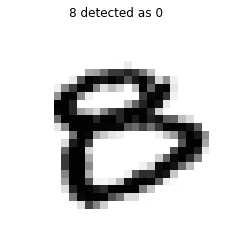

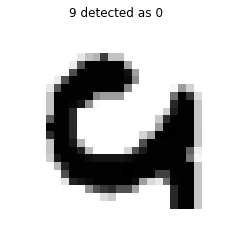

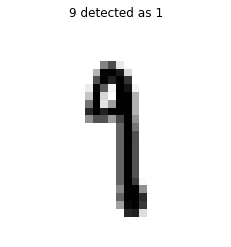

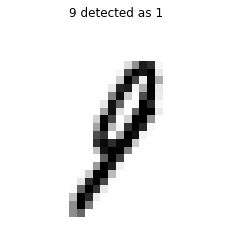

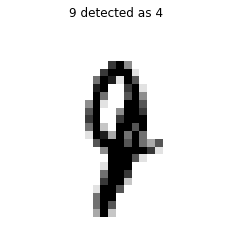

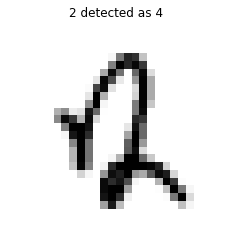

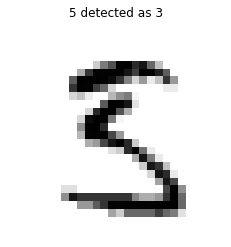

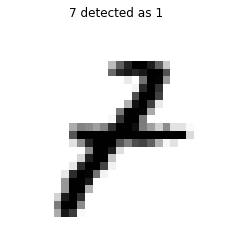

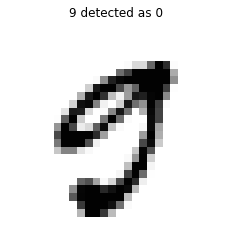

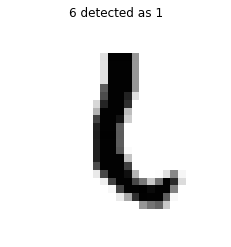

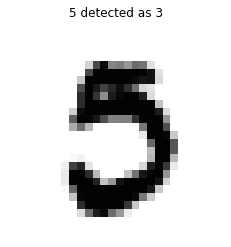

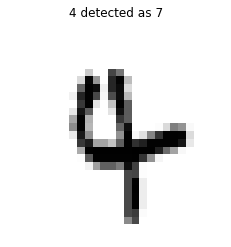

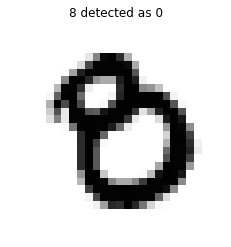

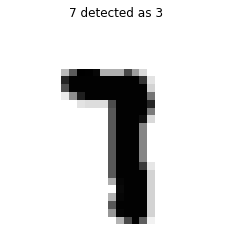

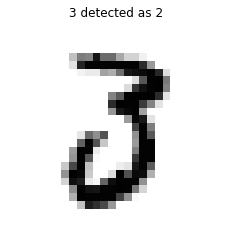

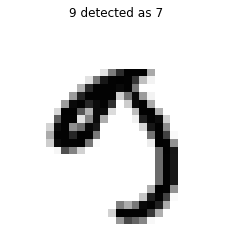

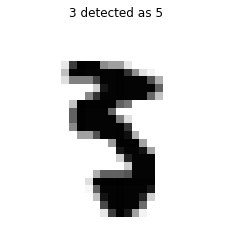

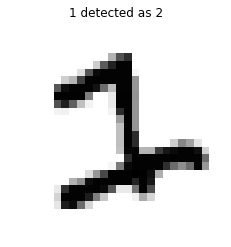

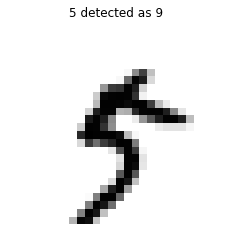

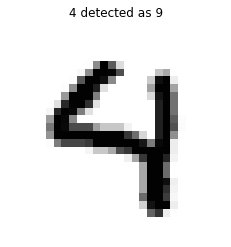

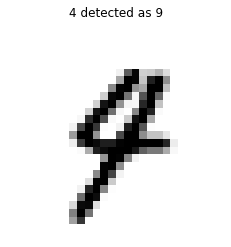

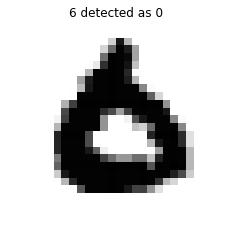

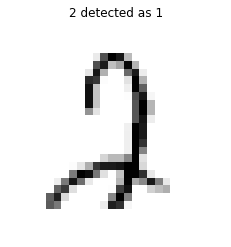

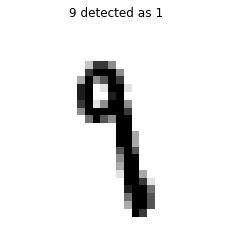

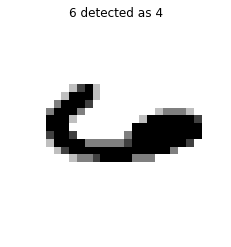

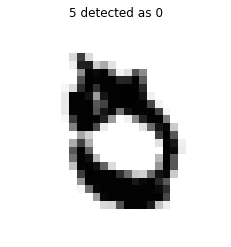

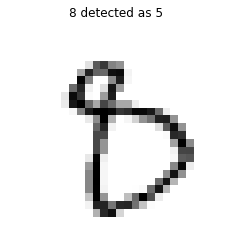

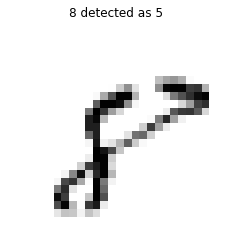

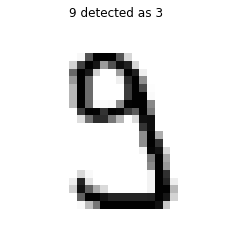

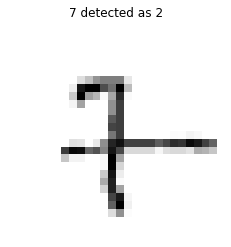

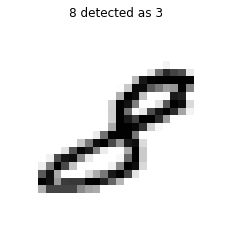

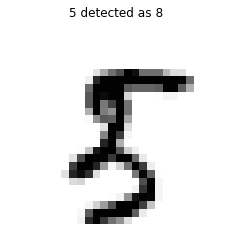

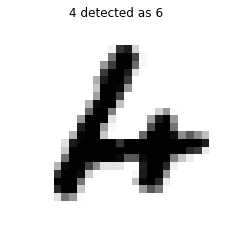

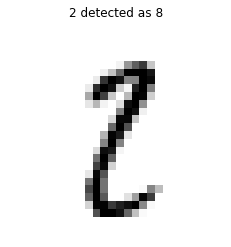

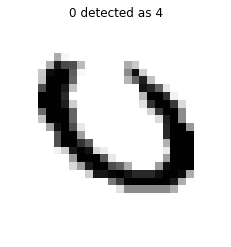

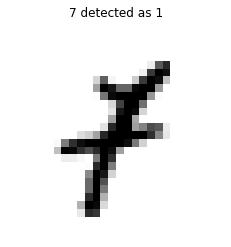

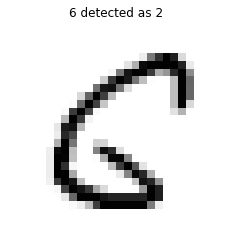

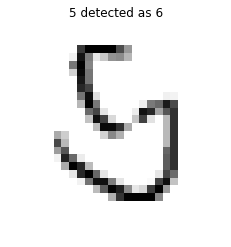

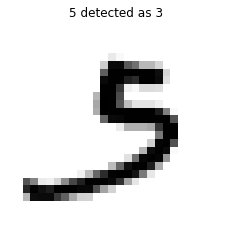

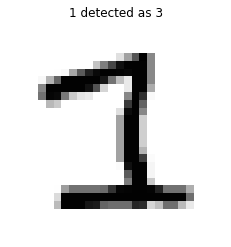

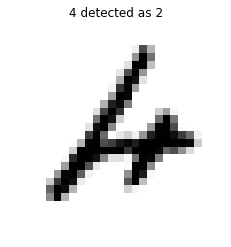

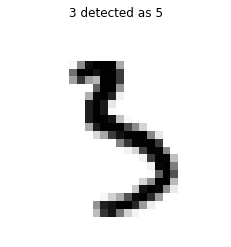

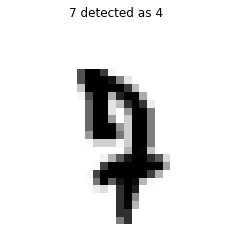

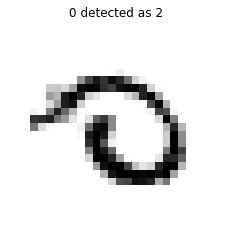

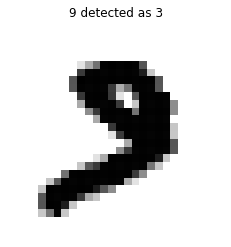

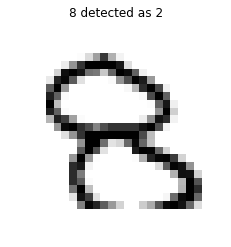

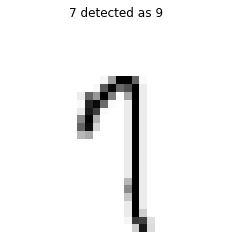

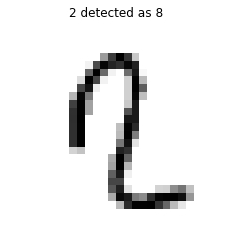

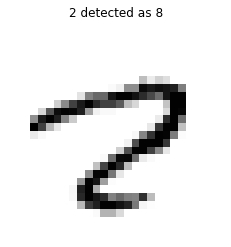

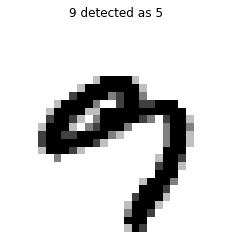

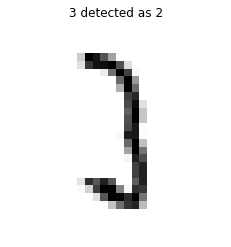

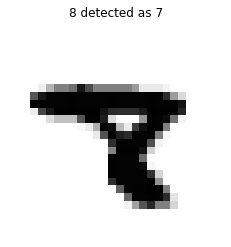

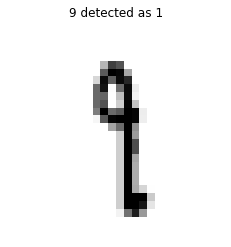

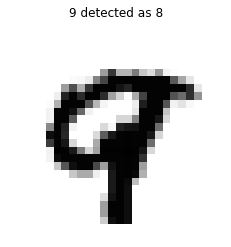

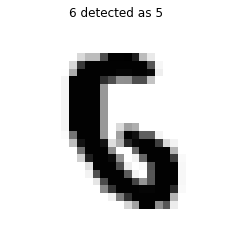

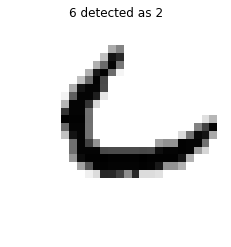

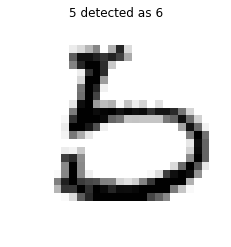

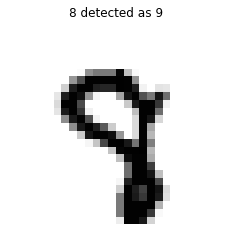

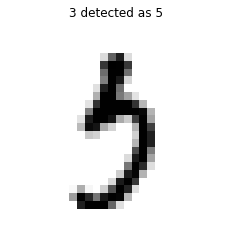

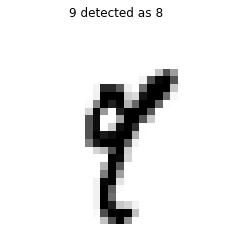

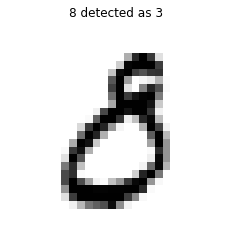

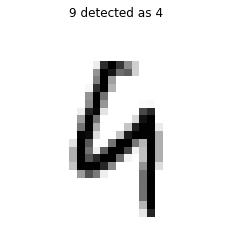

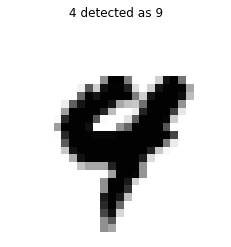

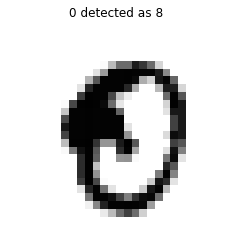

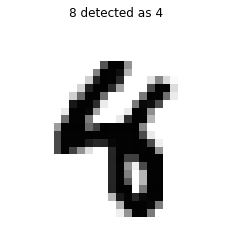

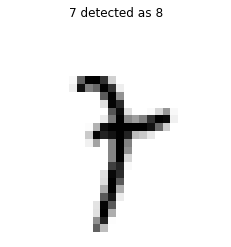

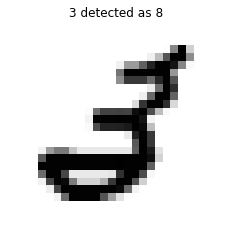

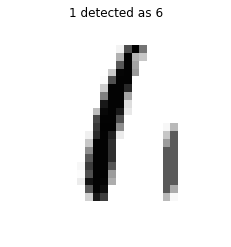

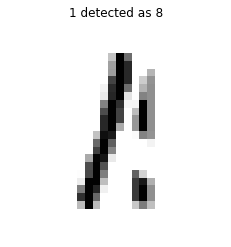

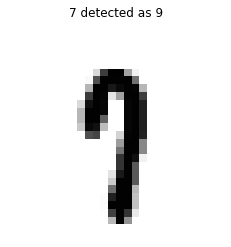

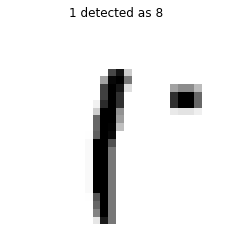

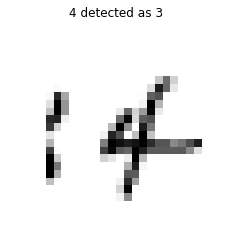

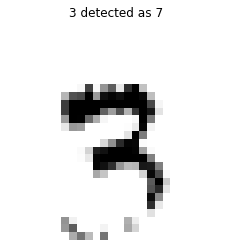

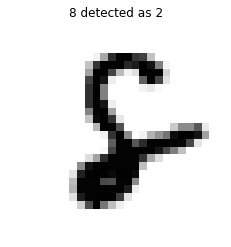

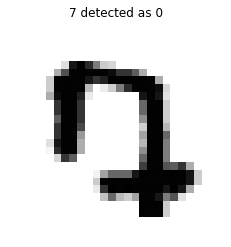

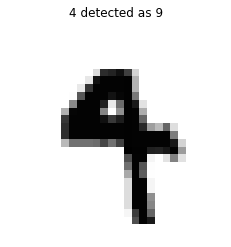

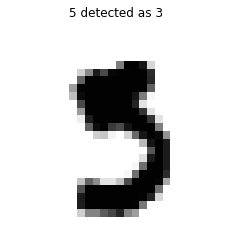

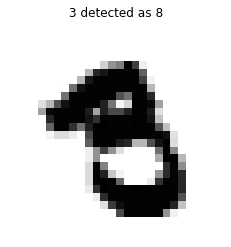

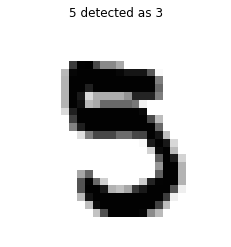

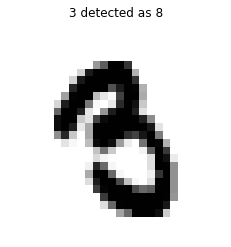

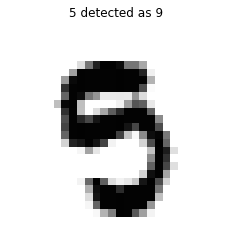

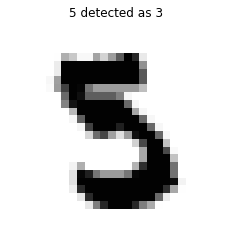

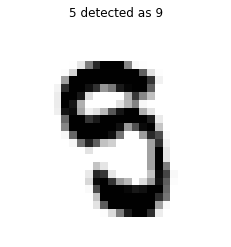

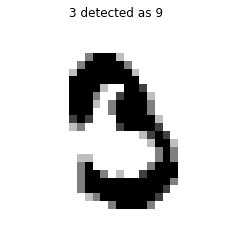

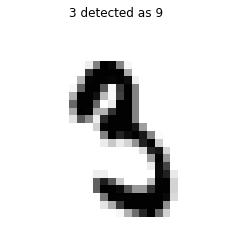

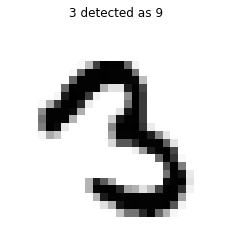

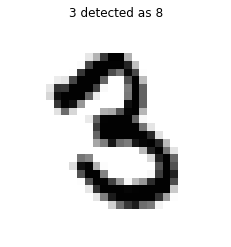

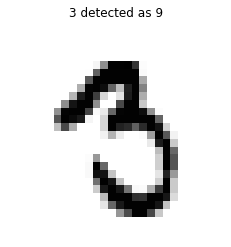

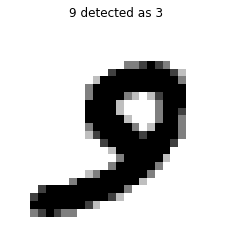

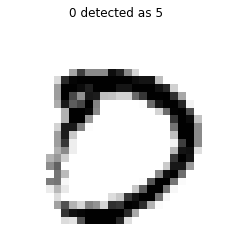

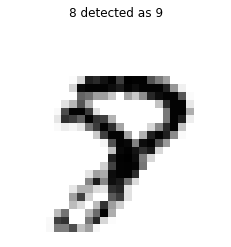

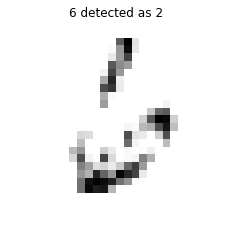

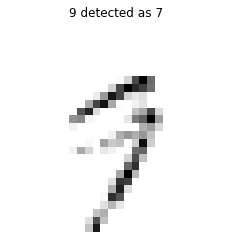

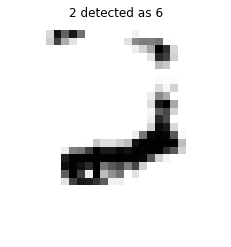

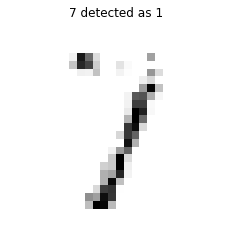

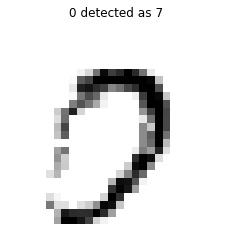

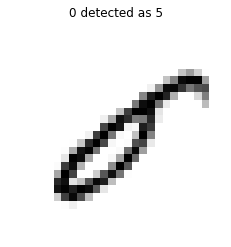

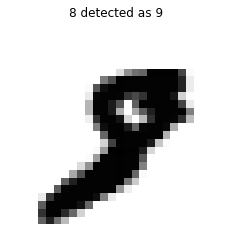

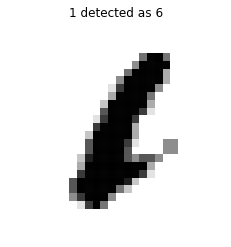

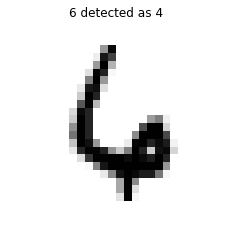

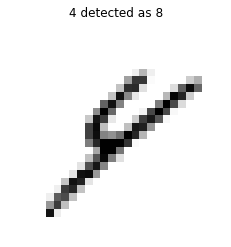

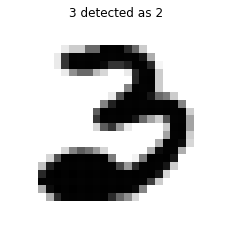

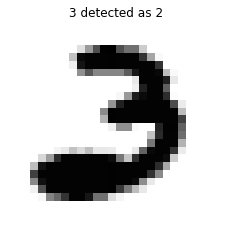

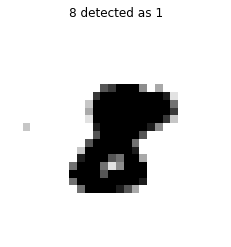

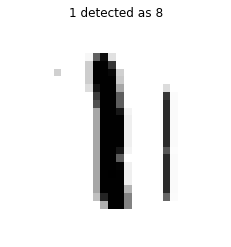

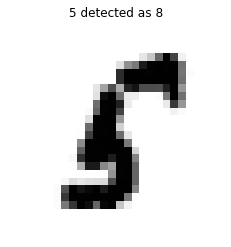

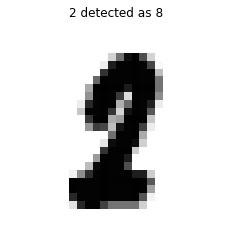

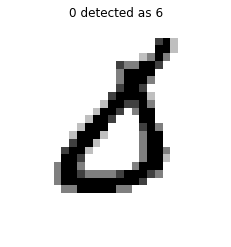

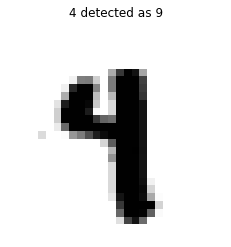

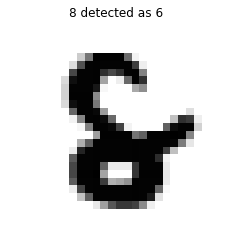

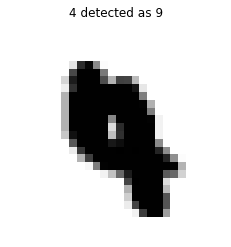

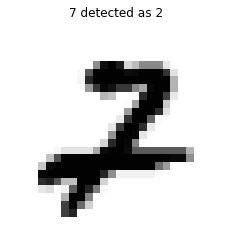

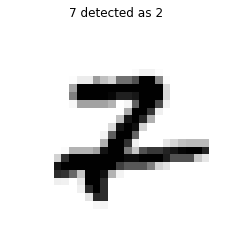

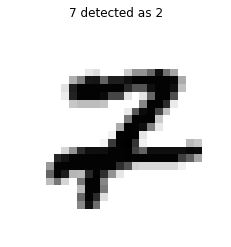

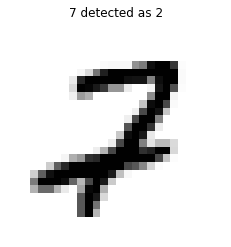

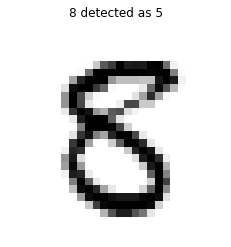

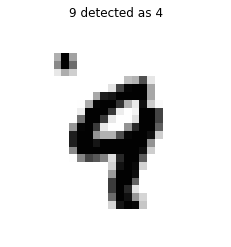

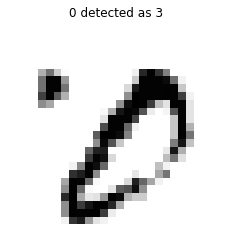

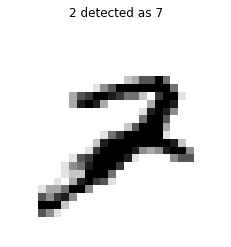

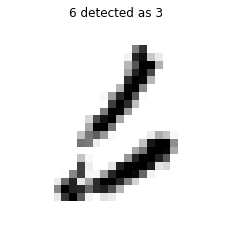

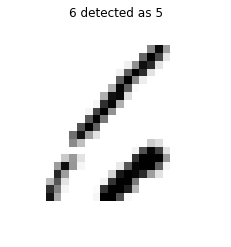

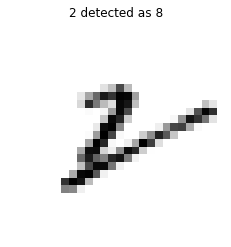

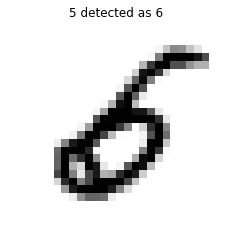

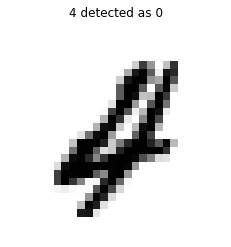

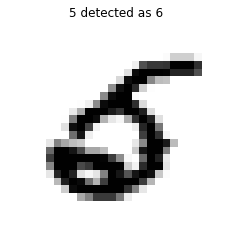

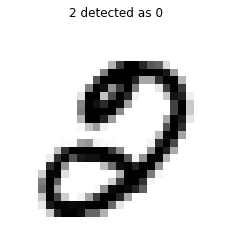

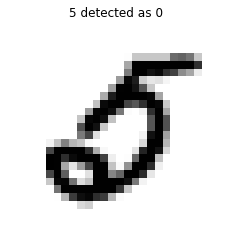

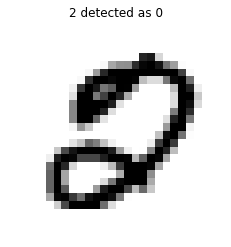

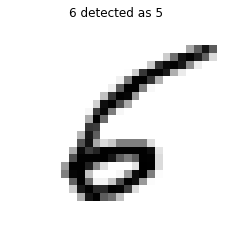

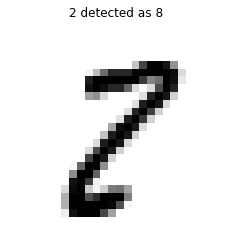

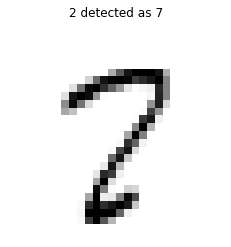

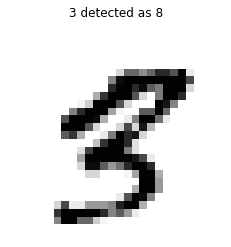

In [ ]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()